## Stan tutorial
* https://www.youtube.com/watch?v=Z1IB4FT_Yog&list=PLCrWEzJgSUqwL85xIj1wubGdY15C5Gf7H&index=3

### Bayes rule

$$ P(B|A) = \frac{P(A|B)P(B)}{P(A)} $$
* $P(B|A)$: Posterior
* $P(A|B)$: Likelihood
* $P(B)$: Prior
* $P(A)$: Evidence, Marginal posterior

In [1]:
import numpy as np
import stan
import nest_asyncio
nest_asyncio.apply()
%load_ext autoreload
%autoreload 2

In [2]:
CTR_model = """
data { 
    int<lower=0> n; // number of observations
    array[n] int y1; // observed array
    array[n] int y2; // observed array
}

parameters {
    real<lower=0, upper=1> theta1; // mean probability of the first distribution
    real<lower=0, upper=1> theta2; // mean probability of the second distribution
}

model{
    theta1 ~ beta(1, 1); //uniform prior
    theta2 ~ beta(1, 1); //uniform prior
    y1 ~ bernoulli(theta1); //likelihood
    y2 ~ bernoulli(theta2); //likelihood
}

generated quantities {
    real theta_diff;
    theta_diff = theta1 - theta2;
}
"""

In [3]:
y_fb = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1])
y_tw = np.array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [4]:
data = {"n": 10, "y1": y_fb, "y2": y_tw}

In [5]:
posterior = stan.build(CTR_model, data=data, random_seed=1)

Building...



Building: found in cache, done.

In [6]:
fit = posterior.sample(num_chains=4, num_samples=1000)

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
  Adjust your expectations accordingly!


In [7]:
params = fit.keys()

In [8]:
params

KeysView(<stan.Fit>
Parameters:
    theta1: ()
    theta2: ()
    theta_diff: ()
Draws: 4000)

In [16]:
import seaborn as sns

In [29]:
theta1_dist = fit["theta1"][0]
theta2_dist = fit["theta2"][0]
delta_dist = fit["theta_diff"][0]

In [21]:
import pandas as pd

In [30]:
result = pd.DataFrame(
    {"theta1": theta1_dist, "theta2": theta2_dist, "delta": delta_dist}
)

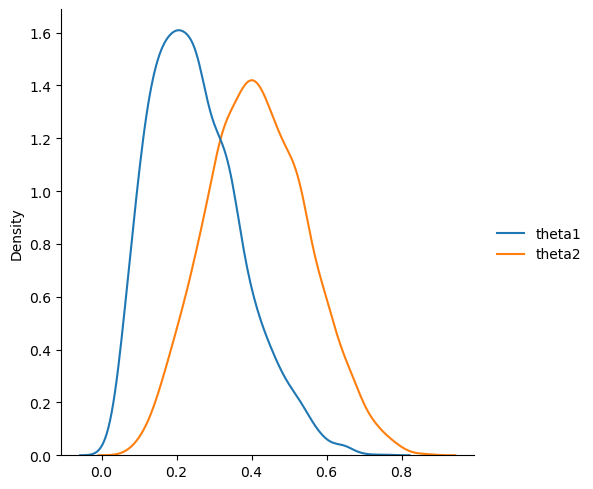

In [33]:
sns.displot(data=result[["theta1", "theta2"]], kind="kde")
# sns.displot(theta2_dist, kind="kde")

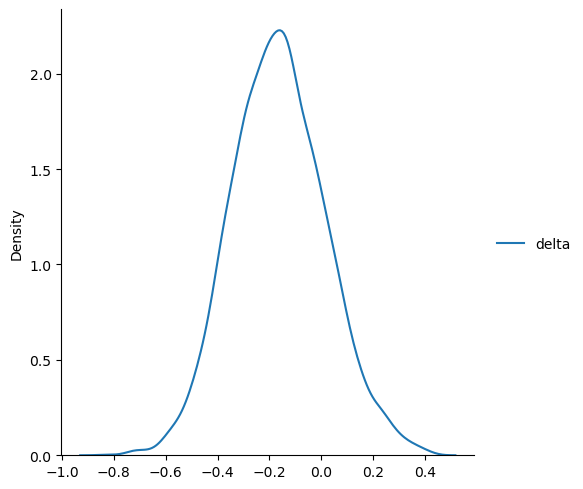

In [34]:
sns.displot(data=result[["delta"]], kind="kde")

In [12]:
len(fit["theta1"])

1

In [14]:
fit["theta1"][0]

array([0.10001464, 0.3838721 , 0.10820454, ..., 0.32527189, 0.39888837,
       0.26000158])